# Project Proposal

- Flow-Chart

## Raw Data

In [1]:
import pandas as pd
data = pd.read_csv('./nlp-getting-started/train.csv')
data.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [2]:
data1 = pd.read_csv('./nlp-getting-started/test.csv', error_bad_lines=False)
data1.describe(include='all')

b'Skipping line 886: expected 4 fields, saw 7\n'


,id,keyword,location,text
count,3264.000000,3238,2160,3264
unique,NaN,221,1600,3243
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,NaN,23,38,3
mean,5434.344363,NaN,NaN,NaN
std,3173.281076,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,2680.250000,NaN,NaN,NaN
50%,5502.000000,NaN,NaN,NaN
75%,8178.250000,NaN,NaN,NaN


In [3]:
data1.columns.unique()

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Analysis
- there are 7613 data points
- 0.80% of the data has missing entries on the keyword column.
- **33.27%** of the data has missing entires on the location column.
- Data is ordered in terms of keyword used to extact the tweet from twitter -> shuffle the data for training. 
- The **#** symbol is a comment when data is stored on a numpy array hence remove all # symbols.
- The **,** symbol is a column delimeter, hence remove it from the location and text columns.

In [5]:
numFake = len(data)-data['target'].sum()
numReal = data['target'].sum()
numFake,numReal

(4342, 3271)

### Decisions 

- The most important columns are the text and target columns
- Missing values on the keyword column can be discarded since the keywords appears within the tweet text itself.
- The location column can not be discarded because only 66.73% have a location value associated with them. Droping 33% of the data is impractical
- It is however worth exploring whether location of tweet has an impact on the real or fake status of a tweet
- e.g. In some locations such as a city centre there cannot be a veld fire - so that is a consideration to be made

## Data Processing

- Data has to be transformed into features to act as inputs for machine learning model in Tensorflow.
- Tweets can be represented using vectors(tensors).
- The popular feature representation techniques:
            - One-Hot Encoding
            - TF-IDF
            - Word Embedding
         
__1. One-Hot Encoding__

- Tockenize all words in text.
- Create a dictionary of size=**n**.
- {key:value} where key=word and value=integer number representation
- Individual words are then represented using vectors of size **n**.
- Each vector has a single entry that is set to 1 while the others are set to 0.
- Example:
       
       Tockenized words:
       ['complex', 'is', 'better', 'than', 'complicated', 'flat', 'is', 'better', 'than', 'nested']
        
       Dictionary: 
        {
          'complex': 0,
          'is': 1,
          'better': 2,
          'than': 3,
          'complicated': 4,
          'flat': 5,
          'nested': 6,
        }

        One-hot encoding:
        [
          [1, 0, 0, 0, 0, 0, 0], #complex 
          [0, 1, 0, 0, 0, 0, 0], #is 
          [0, 0, 1, 0, 0, 0, 0], #better 
          [0, 0, 0, 1, 0, 0, 0], #than 
          [0, 0, 0, 0, 1, 0, 0], #complicated 
        ]

__2. TF-IDF__

- TF-IDF is a score that represents the relative importance of a term in the document and the entire corpus
- Tokenize all the words in the documents
- Create dictionaries for each document of size=n
- Create a unique a union (collection of unique words from all docs)
- For each document, count the number of times a word appears
- Total score of a word: tf(w)*id(w)
- Where t(w): (number of times a word appears in a document)/(Total number of words in the document)
- id(w): log(Number of documents/Number of documents that contain word w)
    
__Tokenized bag of words into numbers for below phrases may output:__  

* the cat sat on my face
* the dog sat on my bed

| ||bed||cat||dog||face||my||on||sat||the|
|----||----||---||----||--||----||--||--||----|
|0||0||1||0||1||1||1||1||1|
|1||1||0||1||0||1||1||1||1|

__TF-IDF gives this__

| ||bed||cat||dog||face||my||on||sat||the|
|----||----||---||----||--||----||--||--||----|
|0||0.0000||0.1155||0.0000||0.1155||0.0000||0.0000||0.0000||0.0000|
|1||0.1155||0.0000||0.1155||0.0000||0.0000||0.0000||0.0000||0.0000|

- Two sentences with some common words but don't say the same thing
- But, turning ba representation does not show that differentiation
- TF-IDF neglects the most common words (highest frequecy) and shows us the main important words in the sentence.
 
__3. Word Embedding__

- Words are represented using feature vectors.
- Example: 
    - Rows are features
    - Columns are words

|   | He  | is  | a  | good  |  boy |
|---|---|---|---|---|---|
| gender  | 1.2  | 0.3  | 0.01  | 0.002  | 1.3  |
|  character | 0.01  | 0.03  |  0.0003 |  1.2 |0.01   |
|  . | .  |  . |  . | .  | .  |
|  . |  . |  . | .  | .  | .  |
|  . | .  |  . | .  | .  |.   |
|  n |  . |  . |  . | .  | .  |

- Common techniques in Python are:
    1. Word2Vec: CBOW and SkipGram
    2. Embedding layer on Keras
    3. Glove

## Machine Learning Model

### Learning

- Input will be batched.
- Batching allows for multiple CPU cores to train on the data concurrently.
- Stochastic Gradient Descent also allows for weights to be updated after training on a single batch is completed as opposed to at the end of an epoch.
- The machine learning model contains sevaral parameters and hyper-parameters:

| Hyper-Parameters  | Parameter  | 
|---|---|
| Set by user  | Updated automatically during training  |  
|  Number of hidden layers | Weights  | 
| Width of hidden layers | Bias |  
| Learning rate  |   |  

**Training**

- When training the aim is to minimise a loss/cost function.
- For classification tasks the common loss function is the cross-entropy loss function: <br/>
$L(w,b) = \sum t_{i} log y_i$
- where $t_i$ is the target and $y_i$ is the obtained output
- To minimize this cost function an optimization algorithm is used.
- A common optimization algorithm is Gradient Descent: $ x_{i+1} = x_{i} - \eta \cdot f'(x)$
- In gradient descent an initial value of x is chosen. 
- The initial value is then used to calculate the next value.
- The difference between the value of x at i and i+1 is evaluated.
- When this difference is small it indicates that the minimum has been reached or that we are close to the minimum.
- When there are multiple minima, gradient descent is likely to classify a local minima as the global minima.
- To solve this, the learning rate should be carefully chosen.

**Gradient Descent Illustration**


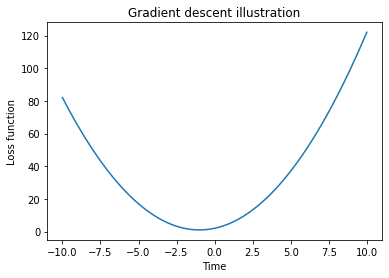

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# create 1000 equally spaced points between -10 and 10
x = np.linspace(-10, 10, 1000)

# calculate the y value for each element of the x vector
y = x**2 + 2*x + 2  

fig, ax = plt.subplots()
ax.set_title('Gradient descent illustration')
ax.set_xlabel('Time')
ax.set_ylabel('Loss function')
ax.plot(x, y) 

**Learning rate** - determines how large the steps taken while in descent are.(the rate at which the ML algorithm forgets old beliefs for new ones).
- If too large it will oscillate around the minimum altogether
- If too small too many iterations will be needing which would take impractical amounts of time to finish
- The inability of GD to detect can be overcome by taking into consideration the momentum.
- Learning rate schedules can be used to find the optimal learning rate
- Some learning rate schedules include AdaGrad, RMSprop and Adam. For this project Adam(Adaptive moment estimation) will be used.

**Back Propagation**
- The weights and biases are randomly initialized.
- Forward propagation is performed and the loss at the end is computed.
- The weights and biases are updated by a fraction of the differential of the loss function.
- The process is repeated until a min loss function is obtained.

### Validation.

- The validation data is used to detect over-fitting.
- The training data will be split into a training set, validation set and testing set.
- The split ratio is 80:10:10
- At the end of an epoch a forward pass is performed on the validation data set and the loss function of that data is calculated.
- This is called the validation loss.
- The validation loss is expected to be close to the training loss. 
- The validation loss is expected to decrease with the training loss.
- Once the validation loss starts increasing, it indicates that the model is over-fitting.
- No backward propagation is performed on the validation data since this would defeat the purpose of detecting over-fitting.
- Early stopping can be used to stop training once the validation loss starts increasing.

### Testing

- Once the model has been trained and validated. The testing data will be input into the model and the error of the model will be obtained.
- The initial target accuracy for this project is 80%.

### Machine Learning Model Architectures.

1. **Multi-Layer perceptron**
    - The most basic NN architechure. 
    - Evaluates input at each node independently.
    
    
2. **Recurrent Neural Network**
    - The multilayer perceptron does not model relationships between different words in a sentence sequence.
    - RNNs solve this by considering the hidden state from previous layers at the current layer.
    - The hidden state and current input are used to compute the hidden state of the current layer.
    - This means the relationship between sequential words is captured.
3. **Long short-term memory (LSTM)** 
    - RNNs suffer from a vanishing gradient.
    - This means that the gradient shrinks as it propagates through time.
    - This leads to ealier layers getting small gradient updates
    - Hence RNNs tend to forget what they have seen in ealier sequences.
    - LSTMs have gates which regulate the flow of information.
    - The gates learn which information in a sequence is important to keep and which information to forget.


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [8]:
# Load dataset
def load_data():
    data = pd.read_csv('./nlp-getting-started/train.csv')
    return data

In [9]:
tweet_df = load_data()
tweet_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [10]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (7613, 5)
Columns are: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
df  = pd.DataFrame(tweet_df[['id', 'text']])

In [13]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = tweet_df[tweet_df['target']==1]
df_NADR = tweet_df[tweet_df['target']==0]
tweet_All = " ".join(review for review in df.text)
tweet_ADR = " ".join(review for review in df_ADR.text)
tweet_NADR = " ".join(review for review in df_NADR.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')

# WordCloud.to_file("first_review.png")

(-0.5, 399.5, 199.5, -0.5)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

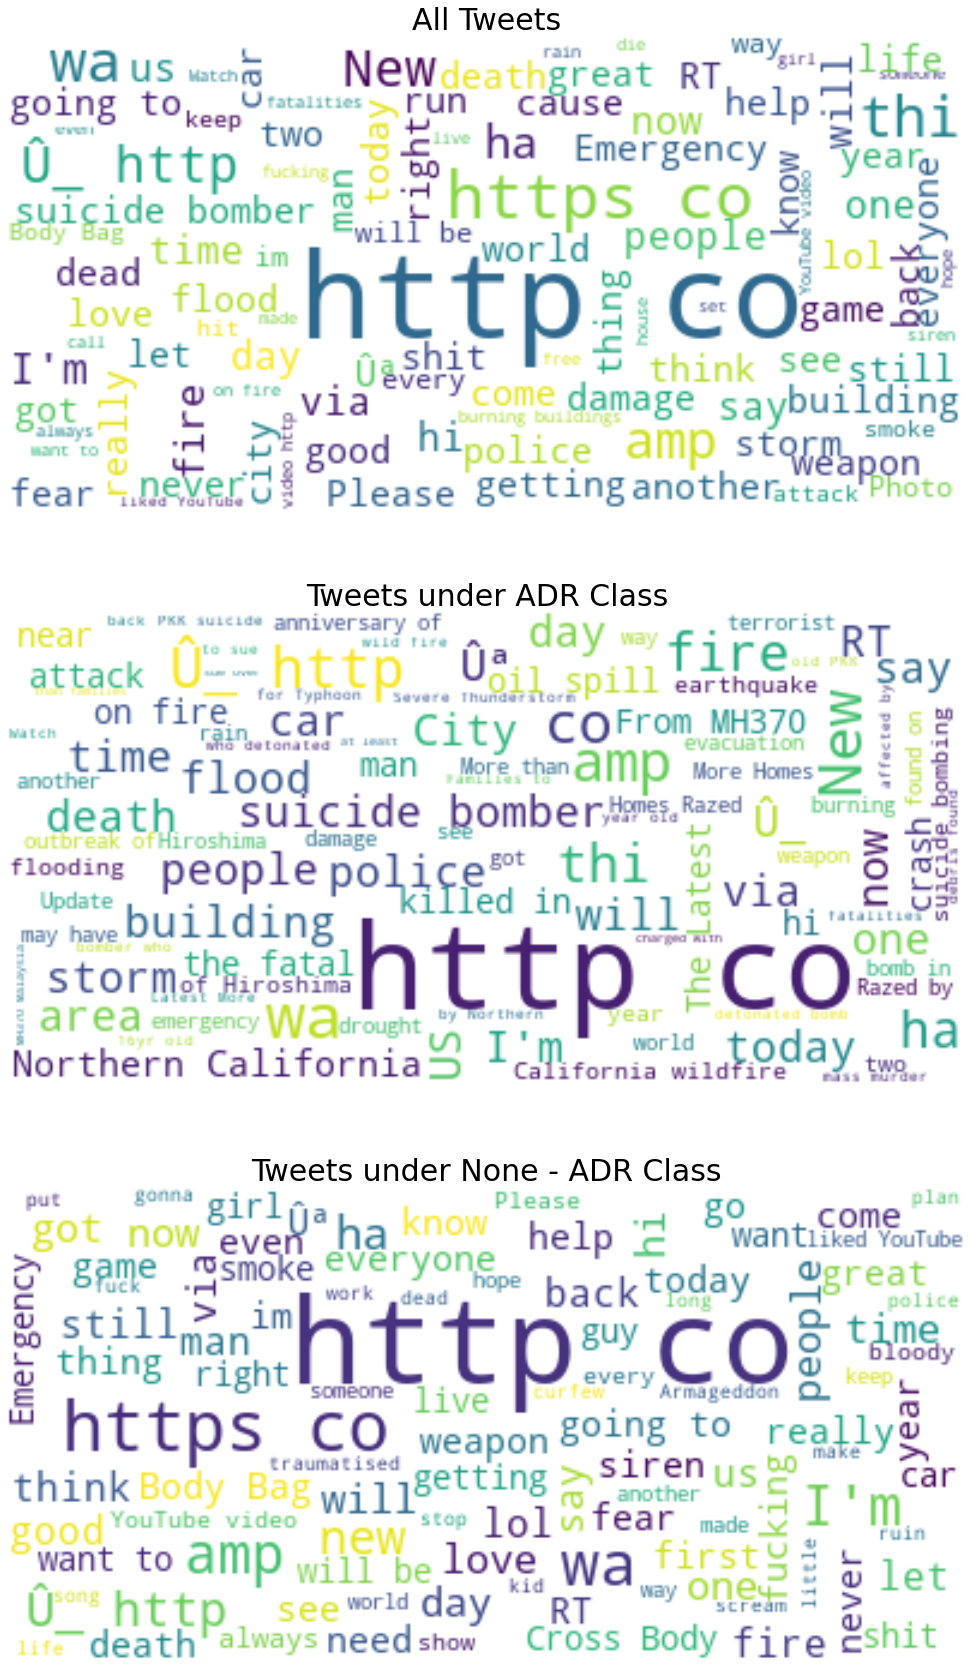

In [14]:
# REMOVE PUNCTUATIONS
string.punctuation

# source: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

In [15]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['text'].apply(lambda x: remove_punct(x))
df.head(10)

,id,text,Tweet_punct
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all
1,4,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,All residents asked to shelter in place are being notified by officers No other evacuation or sh...
3,6,"13,000 people receive #wildfires evacuation orders in California",people receive wildfires evacuation orders in California
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school
5,8,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,RockyFire Update California Hwy closed in both directions due to Lake County fire CAfire wild...
6,10,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas
7,13,I'm on top of the hill and I can see a fire in the woods...,Im on top of the hill and I can see a fire in the woods
8,14,There's an emergency evacuation happening now in the building across the street,Theres an emergency evacuation happening now in the building across the street
9,15,I'm afraid that the tornado is coming to our area...,Im afraid that the tornado is coming to our area


In [16]:
# Tockenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,id,text,Tweet_punct,Tweet_tokenized
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]"
1,4,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,All residents asked to shelter in place are being notified by officers No other evacuation or sh...,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, e..."
3,6,"13,000 people receive #wildfires evacuation orders in California",people receive wildfires evacuation orders in California,"[, people, receive, wildfires, evacuation, orders, in, california, ]"
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, s..."


In [17]:
# stopword removal 
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,id,text,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]","[deeds, reason, earthquake, may, allah, forgive, us]"
1,4,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,All residents asked to shelter in place are being notified by officers No other evacuation or sh...,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, e...","[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expec..."
3,6,"13,000 people receive #wildfires evacuation orders in California",people receive wildfires evacuation orders in California,"[, people, receive, wildfires, evacuation, orders, in, california, ]","[, people, receive, wildfires, evacuation, orders, california, ]"
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, s...","[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school, ]"
5,8,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAf...,RockyFire Update California Hwy closed in both directions due to Lake County fire CAfire wild...,"[rockyfire, update, california, hwy, closed, in, both, directions, due, to, lake, county, fire, ...","[rockyfire, update, california, hwy, closed, directions, due, lake, county, fire, cafire, wildfi..."
6,10,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas,"[flood, disaster, heavy, rain, causes, flash, flooding, of, streets, in, manitou, colorado, spri...","[flood, disaster, heavy, rain, causes, flash, flooding, streets, manitou, colorado, springs, areas]"
7,13,I'm on top of the hill and I can see a fire in the woods...,Im on top of the hill and I can see a fire in the woods,"[im, on, top, of, the, hill, and, i, can, see, a, fire, in, the, woods]","[im, top, hill, see, fire, woods]"
8,14,There's an emergency evacuation happening now in the building across the street,Theres an emergency evacuation happening now in the building across the street,"[theres, an, emergency, evacuation, happening, now, in, the, building, across, the, street]","[theres, emergency, evacuation, happening, building, across, street]"
9,15,I'm afraid that the tornado is coming to our area...,Im afraid that the tornado is coming to our area,"[im, afraid, that, the, tornado, is, coming, to, our, area]","[im, afraid, tornado, coming, area]"


In [24]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

import nltk
nltk.download('punkt')

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 

# Reads ‘alice.txt’ file 
sample = open("alice.txt", "r") 
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ") 

data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 

# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							size = 100, window = 5) 

# Print results 
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ", 
	model1.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ", 
	model1.similarity('alice', 'machines')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
											window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ", 
	model2.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ", 
	model2.similarity('alice', 'machines'))

model1['alice']

[nltk_data] Downloading package punkt to /home/tebogo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9889015
Cosine similarity between 'alice' and 'machines' - CBOW :  0.93483603
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.66891855
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.8394352


array([-0.08751819,  0.01053194, -0.70532936,  0.18005793,  0.31827757,
       -0.4135488 , -0.3041801 ,  0.07336845, -0.7937024 , -0.26372576,
        0.34733304, -0.81550807,  0.24512374,  0.05159221,  0.42250612,
       -0.25039777,  0.2790124 ,  0.29790193, -0.44809875,  0.05704855,
       -0.2673216 ,  0.52976066,  0.03642413,  0.6478725 ,  0.16351408,
        0.717474  ,  0.36837977,  0.48364002,  0.13480127, -0.25777015,
       -0.25783977, -0.456177  ,  0.24021123,  0.07691442, -0.11917122,
       -0.25113112, -0.17883334, -1.1286551 , -0.16864643,  0.0626907 ,
       -0.5693961 , -0.38330993,  1.0108894 ,  0.34503454, -0.0217738 ,
       -0.31820157,  0.23164888, -0.04921163, -0.05030131, -0.7065483 ,
        0.14126948,  0.45085487, -0.03682117, -0.49705315, -0.5570276 ,
        0.35926688,  0.33433092, -0.44322458,  0.10065778, -0.49167302,
       -0.50800383, -0.4898178 ,  0.29877195, -0.3884975 ,  0.3957823 ,
        0.60067004,  0.24697453, -0.10345913, -0.39462364, -0.40